## This notebook shows how to open data files (produced in DD4Hep), and plot hit distributions. It uses awkard arrays. 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
import matplotlib.colors as mcolors


## Get data, transform into akward arrays

In [2]:
input_file = 'rec_piplus_1k.root'
events = ur.open("%s:events"%(input_file))
events.show()
events.keys()
arrays = events.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EcalEndcapNHitsDigi  | vector<eic::RawCalori... | AsGroup(<TBranchElement 'Ec...
EcalEndcapNHitsDi... | uint64_t[]               | AsJagged(AsDtype('>u8'))
EcalEndcapNHitsDi... | uint64_t[]               | AsJagged(AsDtype('>u8'))
EcalEndcapNHitsDi... | uint64_t[]               | AsJagged(AsDtype('>u8'))
EcalEndcapNHitsReco  | vector<eic::Calorimet... | AsGroup(<TBranchElement 'Ec...
EcalEndcapNHitsRe... | uint64_t[]               | AsJagged(AsDtype('>u8'))
EcalEndcapNHitsRe... | float[]                  | AsJagged(AsDtype('>f4'))
EcalEndcapNHitsRe... | float[]                  | AsJagged(AsDtype('>f4'))
EcalEndcapNHitsRe... | float[]                  | AsJagged(AsDtype('>f4'))
EcalEndcapNHitsRe... | float[]                  | AsJagged(AsDtype('>f4'))
EcalEndcapNHitsRe... | float[]                  | AsJagged(AsDtype('>f4'))
E

## Hit postion distributions

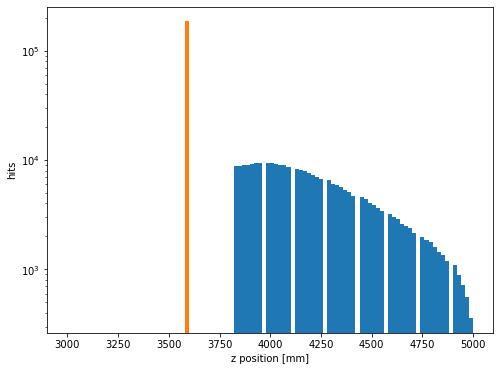

In [8]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.show()

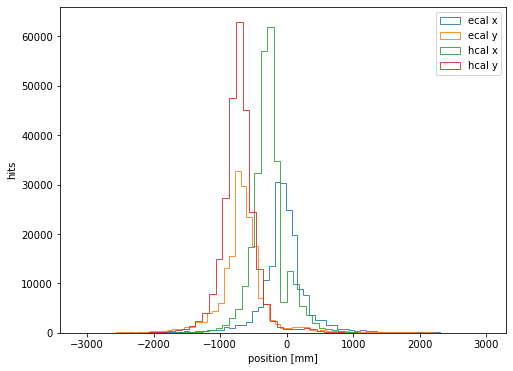

In [10]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.x']),bins=60,label='ecal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.y']),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

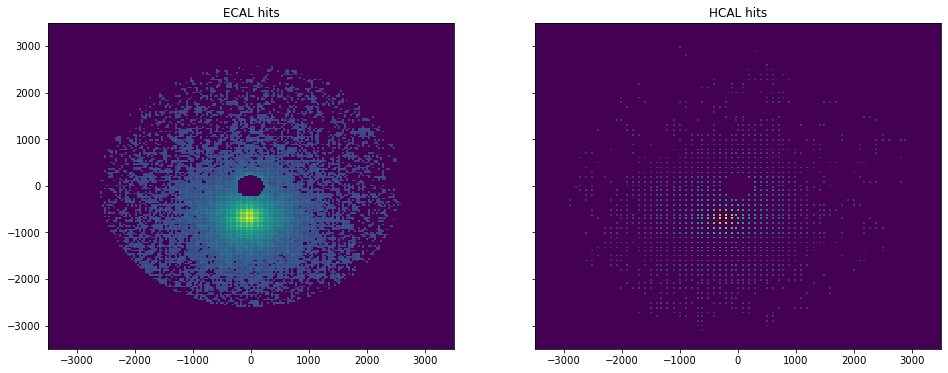

In [11]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))


ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

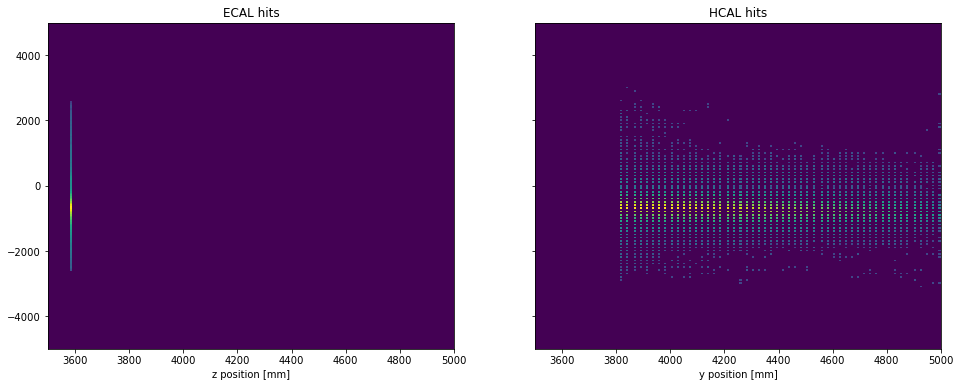

In [21]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('z position [mm]')
ax[1].set_xlabel('y position [mm]')

ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

## Hit energy distributions

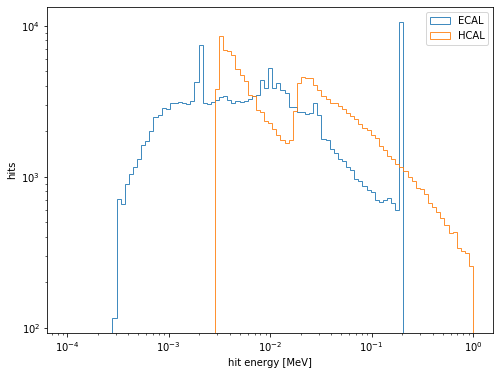

In [52]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [90]:
HCALhits = arrays['HcalEndcapPHitsReco.energy'][:,:]
mask = HCALhits<1e10
HCALhits = HCALhits[mask]
HCAL_total = ak.sum(HCALhits,axis=-1)
HCAL_average = ak.mean(HCALhits,axis=-1)
HCAL_nhits = ak.num(HCALhits)

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = arrays['EcalEndcapPHitsReco.energy'][:,:]
mask = ECALhits<1e10
ECALhits = ECALhits[mask]
ECAL_total = ak.sum(ECALhits,axis=-1)
ECAL_average = ak.mean(ECALhits,axis=-1)
ECAL_nhits = ak.num(ECALhits)

print('total ECAL energy' , ECAL_total)
print('Average hit energy in ECAL' , ECAL_average)

total HCAL energy [4.63, 15.8, 15, 7.77, 5.09, 14.1, 16.6, ... 3.86, 5.02, 10.1, 1.9, 13.6, 7.67, 14.1]
Average hit energy in HCAL [0.0336, 0.0692, 0.0561, 0.0835, 0.0382, ... 0.0538, 0.0365, 0.0723, 0.0502, 0.0468]
total ECAL energy [19, 0.484, 0.714, 0.434, 5.58, 5.41, 1.39, ... 10.2, 6.22, 7.57, 2.6, 6.69, 0.533]
Average hit energy in ECAL [0.0409, 0.0403, 0.0193, 0.0542, 0.0239, ... 0.0208, 0.0394, 0.0163, 0.0352, 0.0222]


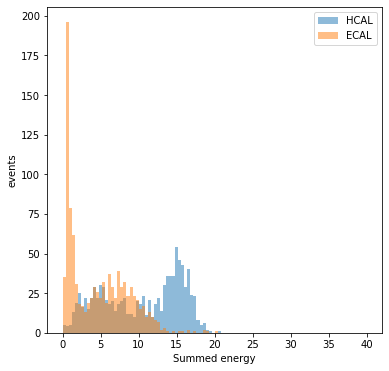

In [91]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_total,bins=100,alpha=0.5,range=(0,40),label='HCAL')
plt.hist(ECAL_total,bins=100,alpha=0.5,range=(0,40),label='ECAL')

plt.xlabel('Summed energy')
plt.ylabel('events')
plt.legend()

plt.show()


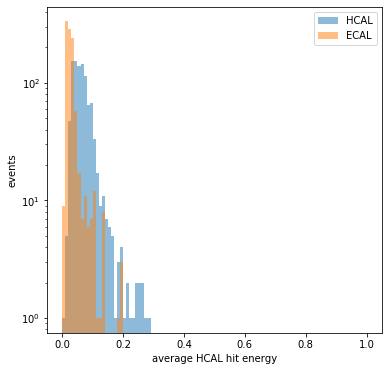

In [93]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,range=(0,1),label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,range=(0,1),label='ECAL')

plt.xlabel('average HCAL hit energy')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


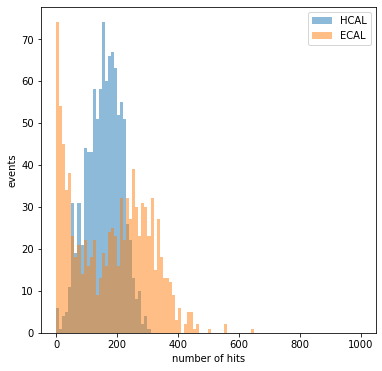

In [100]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
#plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))